## Polynomial regression

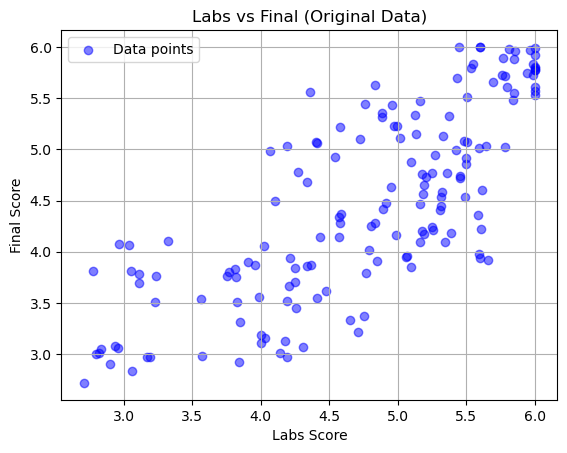

In [3]:
#load packages, create the dataset

%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initial data
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# Extract the features we want to use: Labs vs Final
X = df_aug['Labs'].values.reshape(-1, 1)
y = df_aug['Final'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)


plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.title('Labs vs Final (Original Data)')
plt.xlabel('Labs Score')
plt.ylabel('Final Score')
plt.grid(True)
plt.legend()

Text(0.5, 1.0, 'Comparison of Polynomial Regression Models')

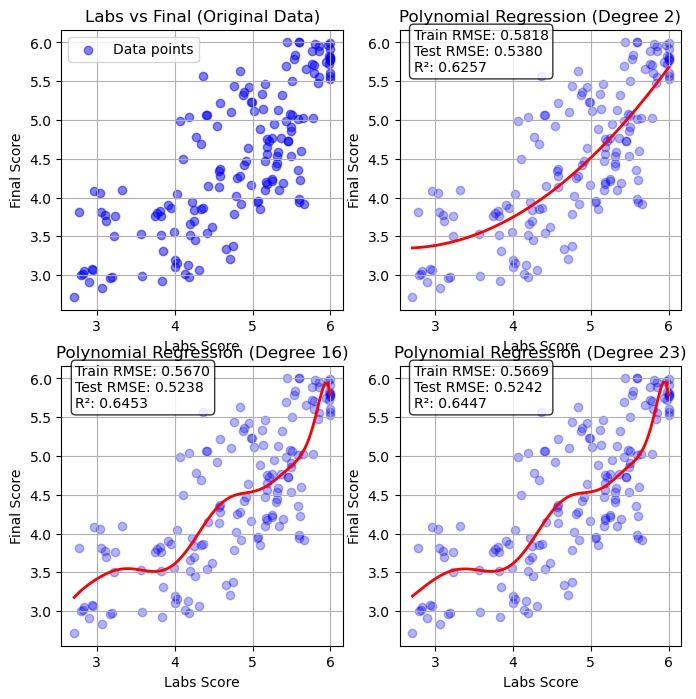

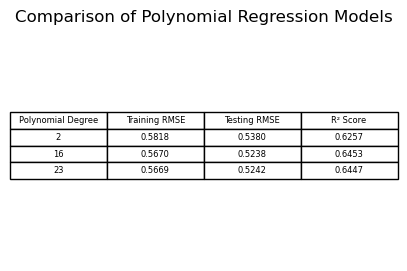

In [4]:
# Function to create and fit polynomial regression models and the RMSE error estimation

def fit_polynomial_regression(degree, X_train, y_train, X_test, y_test):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    
    return model, poly, train_rmse, test_rmse, r2

# Test different polynomial degrees (pick degrees to visualize)
degrees = [2,16,23]
results = []


# plot different degrees from above
plt.figure(figsize=(8, 8))

#  original data points
plt.subplot(2, 2, 1)
# Plot the original data points
plt.subplot(2, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.title('Labs vs Final (Original Data)')
plt.xlabel('Labs Score')
plt.ylabel('Final Score')
plt.grid(True)
plt.legend()

for i, degree in enumerate(degrees):
    # Fit the model
    model, poly, train_rmse, test_rmse, r2 = fit_polynomial_regression(
        degree, X_train, y_train, X_test, y_test
    )
    results.append((degree, train_rmse, test_rmse, r2))
    
    # Plot of the results
    plt.subplot(2, 2, i+2)
    

    plt.scatter(X, y, color='blue', alpha=0.3, label='Data points')
    
    # Create a smooth curve for the polynomial fit
    X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_curve_poly = poly.transform(X_curve)
    y_curve = model.predict(X_curve_poly)
    
    plt.plot(X_curve, y_curve, color='red', linewidth=2, label=f'Degree {degree} Polynomial')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Labs Score')
    plt.ylabel('Final Score')
    plt.grid(True)
    
    
   
    plt.annotate(f'Train RMSE: {train_rmse:.4f}\nTest RMSE: {test_rmse:.4f}\nR²: {r2:.4f}', 
                 xy=(0.05, 0.85), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# table to compare the polynomial degrees
plt.figure(figsize=(5, 3))
plt.axis('tight')
plt.axis('off')
table_data = [['Polynomial Degree', 'Training RMSE', 'Testing RMSE', 'R² Score']]
for degree, train_rmse, test_rmse, r2 in results:
    table_data.append([str(degree), f'{train_rmse:.4f}', f'{test_rmse:.4f}', f'{r2:.4f}'])

plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
plt.title('Comparison of Polynomial Regression Models')



Note, that although the error seems to decrease, the differences are very small. Compared to the spread of the data, the decrease is not really significant. It is also clear that some trands are meaningless (for example the change of direction in the curve at high x and y values for degree 16 and 23.

In [ ]:
# best model based on test RMSE
best_degree = min(results, key=lambda x: x[2])[0]
print(f"The best polynomial degree based on test RMSE is: {best_degree}")

#  best model
best_model, best_poly, _, _, _ = fit_polynomial_regression(
    best_degree, X_train, y_train, X_test, y_test
)

plt.figure(figsize=(4, 4))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing data')

# Create a smooth curve for the polynomial fit
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = best_poly.transform(X_curve)
y_curve = best_model.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color='red', linewidth=2, label=f'Degree {best_degree} Polynomial')
plt.title(f'Best Polynomial Regression Model (Degree {best_degree})')
plt.xlabel('Labs Score')
plt.ylabel('Final Score')
plt.grid(True)
plt.legend()

# Get the coefficients
coefficients = best_model.coef_
intercept = best_model.intercept_

equation = f"Final = {intercept:.4f}"
for i, coef in enumerate(coefficients[1:], 1):  # Skip the first coefficient (it's for x^0)
    equation += f" + {coef:.4f} × Labs^{i}"
    
#plt.annotate(equation, xy=(0.05, 0.05), xycoords='axes fraction',
             #bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

Test for polynomial degrees from 1 to 25

In [ ]:

# Function to create and fit polynomial regression models and the RMS error, also to return the coefficients
def fit_polynomial_regression(degree, X_train, y_train, X_test, y_test):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    
    return model, poly, train_rmse, test_rmse, r2, model.coef_, model.intercept_

# Test polynomial degrees from 1 to 25
degrees = list(range(1, 26))
results = []
all_coefficients = []

for degree in degrees:
    # Fit the model
    model, poly, train_rmse, test_rmse, r2, coefs, intercept = fit_polynomial_regression(
        degree, X_train, y_train, X_test, y_test
    )
    results.append((degree, train_rmse, test_rmse, r2))
    
    # Store coefficients (intercept and all coefficients from the model)
    coef_row = [degree, intercept] + list(coefs[1:])  # Skip the first coefficient (it's for x^0 which is the intercept)
    all_coefficients.append(coef_row)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(results, columns=['Degree', 'Training RMSE', 'Testing RMSE', 'R2 Score'])

# Plot the performance metrics by degree
plt.figure(figsize=(5, 5))

# Plot training and testing RMSE
plt.subplot(2, 1, 1)
plt.plot(metrics_df['Degree'], metrics_df['Training RMSE'], 'o-', color='blue', label='Training RMSE')
plt.plot(metrics_df['Degree'], metrics_df['Testing RMSE'], 'o-', color='red', label='Testing RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.legend()

# Plot R2 score
plt.subplot(2, 1, 2)
plt.plot(metrics_df['Degree'], metrics_df['R2 Score'], 'o-', color='green')
plt.title('R² Score vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Display the metrics table
print("\nPerformance Metrics for Each Polynomial Degree:")
print(metrics_df.to_string(index=False, float_format=lambda x: f"{x:.6f}"))

# Create a DataFrame for coefficients
# First, prepare the column names
max_degree = max(degrees)
coef_columns = ['Degree', 'Intercept'] + [f'X^{i}' for i in range(1, max_degree + 1)]

# Create a DataFrame with the right number of columns, initialized with NaN
coef_df = pd.DataFrame(index=range(len(degrees)), columns=coef_columns)

# Fill in the coefficients - for each row, we only fill up to the degree + 1 columns
for i, row in enumerate(all_coefficients):
    degree = row[0]
    # First two columns: Degree and Intercept
    coef_df.iloc[i, 0] = degree
    coef_df.iloc[i, 1] = row[1]
    
    # Fill in the coefficients for this degree
    for j in range(degree):
        if j + 2 < len(row):  # Make sure we don't go out of bounds
            coef_df.iloc[i, j + 2] = row[j + 2]

# Display the coefficients table (to be improved - doesn't diplay well)
#print("\nCoefficients for Each Polynomial Degree:")
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.width', 1000)  # Increase display width
#print(coef_df.to_string(index=False, float_format=lambda x: f"{x:.6f}" if not pd.isna(x) else ""))

# best model based on test RMSE
best_degree = metrics_df.loc[metrics_df['Testing RMSE'].idxmin(), 'Degree']
print(f"\nThe best polynomial degree based on test RMSE is: {best_degree}")

# best model based on R2 score
best_degree_r2 = metrics_df.loc[metrics_df['R2 Score'].idxmax(), 'Degree']
print(f"The best polynomial degree based on R2 Score is: {best_degree_r2}")

# Plot the best model
best_model, best_poly, _, _, _, _, _ = fit_polynomial_regression(
    int(best_degree), X_train, y_train, X_test, y_test
)

plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing data')

# smooth curve for the polynomial fit
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = best_poly.transform(X_curve)
y_curve = best_model.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color='red', linewidth=2, label=f'Degree {best_degree} Polynomial')
plt.title(f'Best Polynomial Regression Model (Degree {best_degree})')
plt.xlabel('Labs Score')
plt.ylabel('Final Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Save the tables to CSV files
metrics_df.to_csv('polynomial_metrics.csv', index=False)
coef_df.to_csv('polynomial_coefficients.csv', index=False)

In [ ]:
#just plots
#  performance metrics vs degree
plt.figure(figsize=(5, 5))

# training and testing RMSE
plt.subplot(2, 1, 1)
plt.plot(metrics_df['Degree'], metrics_df['Training RMSE'], 'o-', color='blue', label='Training RMSE')
plt.plot(metrics_df['Degree'], metrics_df['Testing RMSE'], 'o-', color='red', label='Testing RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.legend()

# R2 score
plt.subplot(2, 1, 2)
plt.plot(metrics_df['Degree'], metrics_df['R2 Score'], 'o-', color='green')
plt.title('R² Score vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()



In [ ]:
#  plot polynomial regression coefficients
def plot_polynomial_coefficients(X_train, y_train, max_degree=25):
    coef_df = pd.DataFrame()  # DataFrame to store coefficients

    for degree in range(1, max_degree + 1):
        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_train)

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Pad coefficients with NaN to match the maximum degree
        coefficients = model.coef_
        padded_coefficients = np.pad(coefficients, (0, max_degree - len(coefficients)), 
                              mode='constant', constant_values=np.nan)

        # Store coefficients in DataFrame
        coef_df[f'Degree {degree}'] = padded_coefficients

    # Set index for the DataFrame (X^1, X^2, ..., X^max_degree)
    coef_df.index = [f'X^{i+1}' for i in range(max_degree)]

    # Plot coefficients
    plt.figure(figsize=(10, 8))
    ax = coef_df.plot(kind='bar', figsize=(14, 8))
    plt.title('Polynomial Regression Coefficients for Each Degree')
    plt.xlabel('Feature (Polynomial Term)')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.legend(title='Polynomial Degree', bbox_to_anchor=(1.05, 1), loc='upper left')
 

    return coef_df

# Plot coefficients for polynomial degrees 1 to 25
coefficients_df = plot_polynomial_coefficients(X_train, y_train, max_degree=25)

# Display the coefficients DataFrame
#print(coefficients_df)

Regularization

In [ ]:
#note: there is no regularization yet

%matplotlib inline


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Function to plot polynomial regression results
def plot_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=25, figsize=(15, 20)):
    plt.figure(figsize=(20, 20))
    
    # grid for plotting the polynomial curves
    X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    
    train_rmse_values = []
    test_rmse_values = []
    r2_values = []
    
    for degree in range(1, max_degree + 1):
        # Define the subplot position
        plt.subplot(5, 5, degree)
        
        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
        X_grid_poly = poly_features.transform(X_grid)
        
        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Predict on train and test sets
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2 = r2_score(y_test, y_test_pred)
        
        train_rmse_values.append(train_rmse)
        test_rmse_values.append(test_rmse)
        r2_values.append(r2)
        
        # Plot the data and the model
        plt.scatter(X_train, y_train, s=10, alpha=0.4, color='blue', label='Train data')
        plt.scatter(X_test, y_test, s=10, alpha=0.4, color='green', label='Test data')
        plt.plot(X_grid, model.predict(X_grid_poly), color='red', linewidth=2)
        
        plt.title(f'Degree {degree}\nTest RMSE: {test_rmse:.4f}, R²: {r2:.4f}')
        plt.xlabel('Labs Score')
        plt.ylabel('Final Score')
        plt.xlim(2, 6)
        plt.ylim(2, 6)
        
        # Only show legend for the first plot to avoid cluttering
        if degree == 1:
            plt.legend(loc='upper left', fontsize='small')
    
    plt.tight_layout()
    
    # Plot metrics
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_degree + 1), train_rmse_values, 'o-', label='Train RMSE')
    plt.plot(range(1, max_degree + 1), test_rmse_values, 'o-', label='Test RMSE')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Polynomial Degree')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_degree + 1), r2_values, 'o-', color='green')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R² Score')
    plt.title('R² Score vs Polynomial Degree')
    plt.grid(True)
    
    plt.tight_layout()
    
    return train_rmse_values, test_rmse_values, r2_values

In [ ]:
# Function to plot polynomial regression with L2 regularization (ridge regression)

def plot_ridge_regression(X_train, y_train, X_test, y_test, degree=10, alpha_values=[ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], figsize=(15, 20)):
    plt.figure(figsize=[15,25])
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Create a grid for plotting the polynomial curves
    X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_grid_poly = poly_features.transform(X_grid)
    
    test_rmse_values = []
    r2_values = []
    
    for i, alpha in enumerate(alpha_values):
        # Define the subplot position
        plt.subplot(4, 4, i + 1)
        
        # Fit Ridge regression model (L2 regularization)
        model = Ridge(alpha=alpha)
        model.fit(X_train_poly, y_train)
        
        # Predict on train and test sets
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Calculate metrics
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2 = r2_score(y_test, y_test_pred)
        
        test_rmse_values.append(test_rmse)
        r2_values.append(r2)
        
        # Plot the data and the model
        plt.scatter(X_train, y_train, s=10, alpha=0.4, color='blue', label='Training data')
        plt.scatter(X_test, y_test, s=10, alpha=0.4, color='green', label='Testing data')
        plt.plot(X_grid, model.predict(X_grid_poly), color='red', linewidth=2)
        
        plt.title(f'Lambda = {alpha}\nTest RMSE: {test_rmse:.4f}, R²: {r2:.4f}, d=16', fontsize=10)
        plt.xlabel('Labs Score')
        plt.ylabel('Final Score')
        plt.xlim(2, 6)
        plt.ylim(2, 6)
        
        # Only show legend for the first plot to avoid cluttering
        if i == 0:
            plt.legend(loc='upper left', fontsize='small')
    plt.show()
    
    
    # Plot coefficients for different alpha values
    plt.figure(figsize=figsize)
    
    coef_df = pd.DataFrame()
    
   
    
    return test_rmse_values, r2_values, coef_df

# Run polynomial regression with degrees 1 to 25
train_rmse, test_rmse, r2_scores = plot_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=25)

# Run Ridge regression with different alpha values for degree 16 polynomial
best_degree = test_rmse.index(min(test_rmse)) + 1  # Find the degree with minimum test RMSE
print(f"Best polynomial degree based on test RMSE: {best_degree}")

# Choose degree 16 for Ridge regression demonstration
ridge_degree = 16
alpha_values = [  0.001, 0.01, 0.1, 1, 10, 100]
ridge_rmse, ridge_r2, ridge_coef = plot_ridge_regression(X_train, y_train, X_test, y_test, 
                                                         degree=ridge_degree, 
                                                         alpha_values=alpha_values)

# Identify the best alpha value
best_alpha_idx = ridge_rmse.index(min(ridge_rmse))
best_alpha = alpha_values[best_alpha_idx]
print(f"Best lambda value for Ridge regression: {best_alpha}")

In [ ]:

%matplotlib inline


# Compare regular polynomial regression vs Ridge regression for polynmial degree 16 (because it is the best according to the metrics calculation)
plt.figure(figsize=(5, 5))
plt.plot(alpha_values, ridge_rmse, 'o-', color='red', label=f'Ridge (Degree {ridge_degree})')
plt.axhline(y=test_rmse[ridge_degree-1], color='blue', linestyle='--', 
            label=f'Regular Polynomial (Degree {ridge_degree})')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Test RMSE')
plt.title('L2 Regularization Effect on Test RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()

We will plot the coefficients (without regularization) for all the polynomial degrees. 

In [ ]:
# Add this code only after creating the coefficients DataFrame (coef_df) (can be improved)

# Plot the coefficients for each degree
plt.figure(figsize=(15, 8))

# Create a heatmap of coefficients
plt.subplot(1, 2, 1)
# Convert DataFrame to numeric matrix, replacing NaN with 0
coef_matrix = coef_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').fillna(0).values
degrees = coef_df['Degree'].values
plt.imshow(coef_matrix, aspect='auto', cmap='coolwarm')
plt.colorbar(label='Coefficient Value')
plt.title('Polynomial Coefficients Heatmap')
plt.xlabel('Coefficient Power')
plt.ylabel('Polynomial Degree')
plt.yticks(range(len(degrees)), degrees)
plt.xticks(range(coef_matrix.shape[1]), range(1, coef_matrix.shape[1]+1))

# Plot the coefficient values for selected degrees
plt.subplot(1, 2, 2)
selected_degrees = [1, 3, 5, 10, 15, 20]
for degree in selected_degrees:
    if degree in degrees:
        idx = list(degrees).index(degree)
        coeffs = coef_matrix[idx, :degree]
        plt.plot(range(1, len(coeffs)+1), coeffs, 'o-', label=f'Degree {degree}')

plt.title('Coefficient Values for Selected Polynomial Degrees')
plt.xlabel('Coefficient Power')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Now we visualize the coefficients with and without regularization (so, "standard" and ridge regression, where "ridge" means with regularization)

In [ ]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)

# Function to fit polynomial regression and Ridge regression
def fit_models(X_train, y_train, degrees, alpha=1.0):
    results = {}
    for degree in degrees:
        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_train)

        # Fit LinearRegression (no regularization)
        linear_model = LinearRegression()
        linear_model.fit(X_train_poly, y_train)

        # Fit Ridge regression (L2 regularization)
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_poly, y_train)

        # Store coefficients
        results[degree] = {
            'Linear Coefficients': linear_model.coef_,
            'Ridge Coefficients': ridge_model.coef_
        }
    return results

# Degrees to analyze 
degrees = [1, 2, 9, 16, 23]

# Fit models
results = fit_models(X_train, y_train, degrees, alpha=1.0)

# Plot coefficients before and after Ridge regularization
plt.figure(figsize=(18, 12))
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i + 1)

    # Get coefficients
    linear_coeffs = results[degree]['Linear Coefficients']
    ridge_coeffs = results[degree]['Ridge Coefficients']

    # Plot LinearRegression coefficients
    plt.plot(range(1, len(linear_coeffs) + 1), linear_coeffs, 'o-', label='Linear Regression')

    # Plot Ridge coefficients
    plt.plot(range(1, len(ridge_coeffs) + 1), ridge_coeffs, 'o-', label='Ridge Regression')

    plt.title(f'Degree {degree} Polynomial Coefficients')
    plt.xlabel('Coefficient Power')
    plt.ylabel('Coefficient Value')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

## Linear Regression with Gradient Descent 

In [5]:
# recreating the dataset
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# initial dataset
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# Extract the Labs and Final columns for our analysis
X_orig = df_aug['Labs'].values.reshape(-1, 1)
y = df_aug['Final'].values

# Add bias term (intercept) to X (so, add a column of ones)
X = np.c_[np.ones(len(X_orig)), X_orig]

We now calculate the gradients manually. Instead of symbolic or numerical computation of the derivatives, we approximate them with the prediction errors. Note that these are NOT the real derivatives, just a crude approximation. In a real implementation, such as PyTorch, TensorFlow, etc., automatic differention is used to calculate iteratively the derivatives.

In [6]:
#illustration of manual calculation of gradient descent
#import numpy as np

# Feature matrix X (3 samples, 2 features)
#X_s = np.array([
#    [1, 2],   # First sample
#    [3, 4],   # Second sample
#    [5, 6]    # Third sample
#])

# Errors vector (prediction errors for each sample)
#errors = np.array([0.1, -0.2, 0.3])

# Manual calculation step by step
# First, transpose X
#X_s_transposed = X_s.T
# X_transposed will be:
# [[1, 3, 5],
#  [2, 4, 6]]

#  Now do the dot product manually
#  multiply each column of X_transposed by the errors vector
#  First feature column: 1*0.1 + 3*(-0.2) + 5*0.3
#  Second feature column: 2*0.1 + 4*(-0.2) + 6*0.3

#manual_result = np.array([
#    1*0.1 + 3*(-0.2) + 5*0.3,   # First feature gradient
#    2*0.1 + 4*(-0.2) + 6*0.3    # Second feature gradient
#])

# Verify with NumPy dot product
#numpy_result = X_s.T.dot(errors)

#print("Manual Result:", manual_result)
#print("NumPy Result: ", numpy_result)

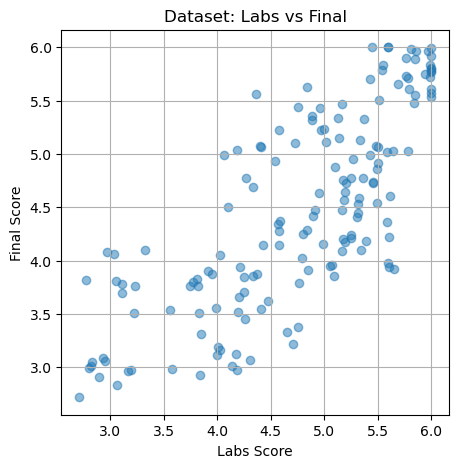

Analytically calculated optimal theta: [0.75394065 0.78224425]


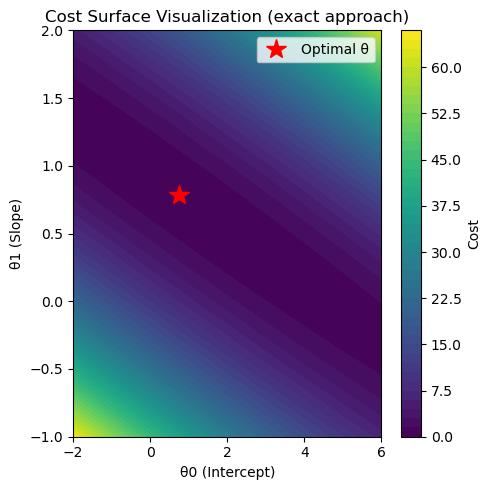

In [7]:
# now for our dataset
# cost function (Mean Squared Error)


def compute_cost(X, y, theta):
    m = len(y)
    # Ensure theta is a 1D array
    theta = theta.flatten() if theta.ndim > 1 else theta
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    theta_history = [theta.copy()]
    
    for i in range(iterations):
        prediction = X.dot(theta)
        error = prediction - y
        gradient = (1/m) * X.T.dot(error)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())
    
    return theta, cost_history, theta_history

# Plot the data
plt.figure(figsize=(5, 5))
plt.scatter(X_orig, y, alpha=0.5)
plt.xlabel('Labs Score')
plt.ylabel('Final Score')
plt.title('Dataset: Labs vs Final')
plt.grid(True)
plt.show()


# Calculate optimal theta analytically for comparison
X_transpose = X.T
optimal_theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
print(f"Analytically calculated optimal theta: {optimal_theta}")

# Create a grid of theta0 and theta1 values for visualization
theta0_vals = np.linspace(-2, 6, 150)
theta1_vals = np.linspace(-1, 2, 150)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros(theta0_grid.shape)

# Calculate cost for each theta0, theta1 combination
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_grid[j, i], theta1_grid[j, i]])
        cost_grid[j, i] = compute_cost(X, y, t)


plt.figure(figsize=(5, 5))
contour = plt.contourf(theta0_grid, theta1_grid, cost_grid, levels=50, cmap='viridis')
plt.colorbar(contour, label='Cost')
plt.xlabel('θ0 (Intercept)')
plt.ylabel('θ1 (Slope)')
plt.title('Cost Surface Visualization (exact approach)')

# Mark the optimal theta point
plt.plot(optimal_theta[0], optimal_theta[1], 'r*', markersize=15, label='Optimal θ')
plt.legend()

plt.tight_layout()
plt.show()



In [10]:
# Gradient Descent method to find optimal theta
theta_initial = np.array([1.0, -0.7])
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    theta_history = np.zeros((num_iters+1, 2))  # +1 to include initial theta
    cost_history = np.zeros(num_iters+1)  # +1 to include initial cost
    
    # Store initial theta and cost
    theta_history[0] = theta
    cost_history[0] = compute_cost(X, y, theta)
    
    for it in range(num_iters):
        prediction = np.dot(X, theta)
        error = prediction - y
        theta = theta - (alpha / m) * np.dot(X.T, error)
        
        # Store updated theta and cost
        theta_history[it+1] = theta
        cost_history[it+1] = compute_cost(X, y, theta)
    
    return theta, theta_history, cost_history

# Gradient descent parameters
alpha = 0.01
num_iters = 1700

# Run gradient descent
theta_gradient_descent, theta_history1, cost1_history = gradient_descent(X, y, theta_initial, alpha, num_iters)

print(f"Gradient Descent optimal theta: {theta_gradient_descent}")

Gradient Descent optimal theta: [1.05244776 0.72164767]


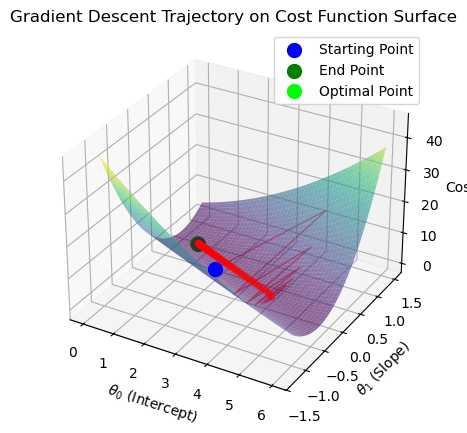

In [11]:
# Gradient descent with many iterations and tuned learning rate
initial_theta = np.array([4.0, -1.3])  # Start far from the optimum
alpha = 0.075  # Learning rate
iterations = 1700  # Increased iterations for better convergence

theta_final, theta_history, cost_history = gradient_descent(X, y, initial_theta, alpha, iterations)
theta_history = np.array(theta_history)


# Plot the 3D trajectory of gradient descent
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# For clearer visualization, sample only a subset of the trajectory points
sample_step = 20  # Show every 20th point
sampled_theta_history = theta_history[::sample_step]
sampled_costs = [compute_cost(X, y, theta) for theta in sampled_theta_history]

# Plot a subset of the surface for better focus on the trajectory
reduced_theta0_vals = np.linspace(0, 6, 100)
reduced_theta1_vals = np.linspace(-1, 1.5, 100)
reduced_theta0_grid, reduced_theta1_grid = np.meshgrid(reduced_theta0_vals, reduced_theta1_vals)
reduced_cost_grid = np.zeros(reduced_theta0_grid.shape)

for i in range(len(reduced_theta0_vals)):
    for j in range(len(reduced_theta1_vals)):
        t = np.array([reduced_theta0_grid[j, i], reduced_theta1_grid[j, i]])
        reduced_cost_grid[j, i] = compute_cost(X, y, t)

surface = ax.plot_surface(reduced_theta0_grid, reduced_theta1_grid, reduced_cost_grid, 
                         cmap='viridis', alpha=0.6)

# Plot the entire trajectory as a line
ax.plot(theta_history[:, 0], theta_history[:, 1], 
        [compute_cost(X, y, theta) for theta in theta_history], 
        'r-', linewidth=1, alpha=0.5)

# Plot sampled points on the trajectory
ax.scatter(sampled_theta_history[:, 0], sampled_theta_history[:, 1], sampled_costs, 
           color='r', s=20)

# Highlight start and end points
ax.scatter(theta_history[0, 0], theta_history[0, 1], compute_cost(X, y, theta_history[0]), 
           color='blue', s=100, label='Starting Point')
ax.scatter(theta_history[-1, 0], theta_history[-1, 1], compute_cost(X, y, theta_history[-1]), 
           color='green', s=100, label='End Point')

# optimal point
optimal_cost = compute_cost(X, y, optimal_theta)
ax.scatter([optimal_theta[0]], [optimal_theta[1]], [optimal_cost], 
           color='lime', s=100, label='Optimal Point')

ax.set_xlabel(r'$\theta_0$ (Intercept)')
ax.set_ylabel(r'$\theta_1$ (Slope)')
ax.set_zlabel('Cost')
ax.set_title('Gradient Descent Trajectory on Cost Function Surface')
plt.legend()

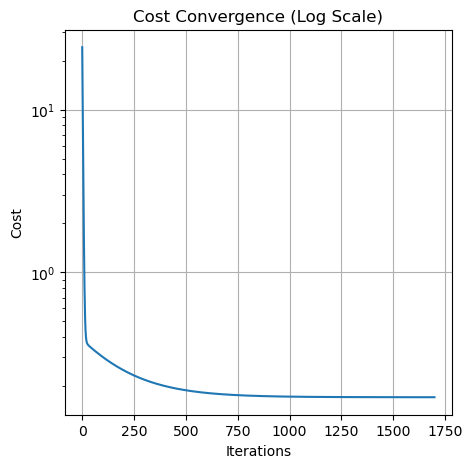

In [12]:
# Plot the convergence of cost over iterations


plt.figure(figsize=(5, 5))

plt.semilogy(range(iterations), cost_history[:-1])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Convergence (Log Scale)')
plt.grid(True)



Final theta after gradient descent: [0.80452957 0.77197476]
Optimal theta: [0.75394065 0.78224425]
Difference: [0.05058891 0.01026949]
Final cost: 0.17083922147860275
Optimal cost: 0.1707949331055775
Initial theta: [ 4.  -1.3]
Learning rate: 0.075
Absolute difference: [0.05058891 0.01026949]
Relative difference (%): [6.70993296 1.3128238 ]


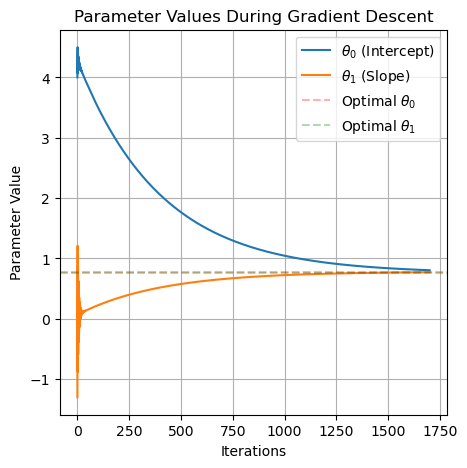

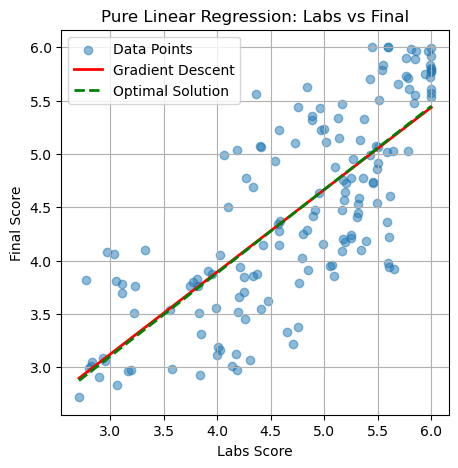

In [13]:
#more plots

# how the theta values change over iterations
plt.figure(figsize=(5, 5))
plt.plot(range(iterations+1), theta_history[:, 0], label=r'$\theta_0$ (Intercept)')
plt.plot(range(iterations+1), theta_history[:, 1], label=r'$\theta_1$ (Slope)')
plt.axhline(y=optimal_theta[0], color='r', linestyle='--', alpha=0.3, label=r'Optimal $\theta_0$')
plt.axhline(y=optimal_theta[1], color='g', linestyle='--', alpha=0.3, label=r'Optimal $\theta_1$')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Parameter Values During Gradient Descent')
plt.legend()
plt.grid(True)


# final linear regression model: it is almost identical to the analytical linear regression model!
plt.figure(figsize=(5, 5))
plt.scatter(X_orig, y, alpha=0.5, label='Data Points')

# Plot gradient descent solution
X_range = np.linspace(min(X_orig), max(X_orig), 100).reshape(-1, 1)
X_range_with_bias = np.c_[np.ones(len(X_range)), X_range]
y_pred_gd = X_range_with_bias.dot(theta_final)
plt.plot(X_range, y_pred_gd, color='red', linewidth=2, label='Gradient Descent')

# Plot optimal solution
y_pred_optimal = X_range_with_bias.dot(optimal_theta)
plt.plot(X_range, y_pred_optimal, 'g--', linewidth=2, label='Optimal Solution')

plt.xlabel('Labs Score')
plt.ylabel('Final Score')
plt.title('Pure Linear Regression: Labs vs Final')
plt.legend()
plt.grid(True)


print(f"Final theta after gradient descent: {theta_final}")
print(f"Optimal theta: {optimal_theta}")
print(f"Difference: {np.abs(theta_final - optimal_theta)}")
print(f"Final cost: {cost_history[-1]}")
print(f"Optimal cost: {compute_cost(X, y, optimal_theta)}")

# Display the theta values and convergence metrics
print(f"Initial theta: {initial_theta}")
print(f"Learning rate: {alpha}")

print(f"Absolute difference: {np.abs(theta_final - optimal_theta)}")
print(f"Relative difference (%): {100 * np.abs(theta_final - optimal_theta) / np.abs(optimal_theta)}")

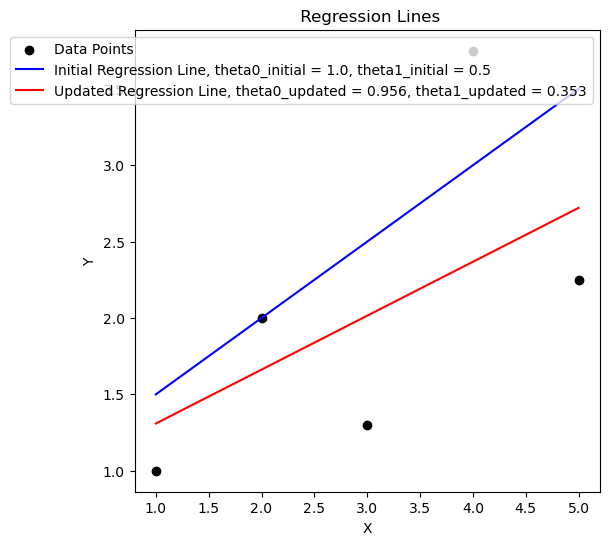

In [14]:
#Solve task from the lecture

import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
Y = np.array([1.0, 2.0, 1.3, 3.75, 2.25])

# Initial parameters
theta0_initial = 1.0
theta1_initial = 0.5

# Updated parameters after one step of gradient descent
theta0_updated = 0.956
theta1_updated = 0.353

# Regression lines
def regression_line(X, theta0, theta1):
    return theta0 + theta1 * X

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(X, Y, color='black', label='Data Points')

# Initial regression line
plt.plot(X, regression_line(X, theta0_initial, theta1_initial), color='blue', label='Initial Regression Line, theta0_initial = 1.0, theta1_initial = 0.5')

# Updated regression line
plt.plot(X, regression_line(X, theta0_updated, theta1_updated), color='red', label='Updated Regression Line, theta0_updated = 0.956, theta1_updated = 0.353')

# Labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title(' Regression Lines')
plt.legend(loc = 'best',fontsize=10)
plt.show()